In [1]:
%matplotlib inline

In [2]:
# import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib as mp
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder
from pandas.plotting import scatter_matrix

In [3]:
data = pd.read_csv('Train_Test_Network.csv')

In [4]:
data.head()

,ts,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,...,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,label,type
0,1554198358,3.122.49.24,1883,192.168.1.152,52976,tcp,-,80549.530260,1762852,41933215,...,0,0,-,-,-,bad_TCP_checksum,-,F,0,normal
1,1554198358,192.168.1.79,47260,192.168.1.255,15600,udp,-,0.000000,0,0,...,0,0,-,-,-,-,-,-,0,normal
2,1554198359,192.168.1.152,1880,192.168.1.152,51782,tcp,-,0.000000,0,0,...,0,0,-,-,-,bad_TCP_checksum,-,F,0,normal
3,1554198359,192.168.1.152,34296,192.168.1.152,10502,tcp,-,0.000000,0,0,...,0,0,-,-,-,-,-,-,0,normal
4,1554198362,192.168.1.152,46608,192.168.1.190,53,udp,dns,0.000549,0,298,...,0,0,-,-,-,bad_UDP_checksum,-,F,0,normal


In [5]:
data.drop(columns=['label','ts'])

,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,...,http_request_body_len,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,type
0,3.122.49.24,1883,192.168.1.152,52976,tcp,-,80549.530260,1762852,41933215,OTH,...,0,0,0,-,-,-,bad_TCP_checksum,-,F,normal
1,192.168.1.79,47260,192.168.1.255,15600,udp,-,0.000000,0,0,S0,...,0,0,0,-,-,-,-,-,-,normal
2,192.168.1.152,1880,192.168.1.152,51782,tcp,-,0.000000,0,0,OTH,...,0,0,0,-,-,-,bad_TCP_checksum,-,F,normal
3,192.168.1.152,34296,192.168.1.152,10502,tcp,-,0.000000,0,0,OTH,...,0,0,0,-,-,-,-,-,-,normal
4,192.168.1.152,46608,192.168.1.190,53,udp,dns,0.000549,0,298,SHR,...,0,0,0,-,-,-,bad_UDP_checksum,-,F,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461038,192.168.1.32,33108,176.28.50.165,80,tcp,-,0.000000,0,0,S0,...,0,0,0,-,-,-,-,-,-,xss
461039,192.168.1.33,37242,34.230.157.88,443,tcp,-,0.000000,0,0,OTH,...,0,0,0,-,-,-,-,-,-,ransomware
461040,192.168.1.37,4444,192.168.1.193,49178,tcp,-,290.371539,101568,2592,OTH,...,0,0,0,-,-,-,-,-,-,backdoor
461041,192.168.1.31,60816,104.98.29.100,443,tcp,-,23.190902,32,31,SF,...,0,0,0,-,-,-,-,-,-,mitm


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461043 entries, 0 to 461042
Data columns (total 45 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ts                      461043 non-null  int64  
 1   src_ip                  461043 non-null  object 
 2   src_port                461043 non-null  int64  
 3   dst_ip                  461043 non-null  object 
 4   dst_port                461043 non-null  int64  
 5   proto                   461043 non-null  object 
 6   service                 461043 non-null  object 
 7   duration                461043 non-null  float64
 8   src_bytes               461043 non-null  int64  
 9   dst_bytes               461043 non-null  int64  
 10  conn_state              461043 non-null  object 
 11  missed_bytes            461043 non-null  int64  
 12  src_pkts                461043 non-null  int64  
 13  src_ip_bytes            461043 non-null  int64  
 14  dst_pkts            

In [7]:
data['type'].value_counts()

normal        300000
backdoor       20000
password       20000
ransomware     20000
injection      20000
xss            20000
ddos           20000
scanning       20000
dos            20000
mitm            1043
Name: type, dtype: int64

In [8]:
label_type=LabelEncoder()
data['type']=label_type.fit_transform(data['type'])
label_ip=LabelEncoder()
data['src_ip']=label_type.fit_transform(data['src_ip'])
label_type=LabelEncoder()
data['proto']=label_type.fit_transform(data['proto'])
label_sip=LabelEncoder()
data['dst_ip']=label_type.fit_transform(data['dst_ip'])
label_ser=LabelEncoder()
data['service']=label_type.fit_transform(data['service'])
label_conn=LabelEncoder()
data['conn_state']=label_type.fit_transform(data['conn_state'])
label_dns=LabelEncoder()
data['dns_query']=label_type.fit_transform(data['dns_query'])
label_dnsaa=LabelEncoder()
data['dns_rejected']=label_type.fit_transform(data['dns_rejected'])
label_ssl=LabelEncoder()
data['ssl_version']=label_type.fit_transform(data['ssl_version'])
label_http=LabelEncoder()
data['http_method']=label_type.fit_transform(data['http_method'])
label_name=LabelEncoder()
data['weird_name']=label_type.fit_transform(data['weird_name'])
label_weirda=LabelEncoder()
data['weird_addl']=label_type.fit_transform(data['weird_addl'])
label_notice=LabelEncoder()
data['weird_notice']=label_type.fit_transform(data['weird_notice'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461043 entries, 0 to 461042
Data columns (total 45 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ts                      461043 non-null  int64  
 1   src_ip                  461043 non-null  int32  
 2   src_port                461043 non-null  int64  
 3   dst_ip                  461043 non-null  int32  
 4   dst_port                461043 non-null  int64  
 5   proto                   461043 non-null  int32  
 6   service                 461043 non-null  int32  
 7   duration                461043 non-null  float64
 8   src_bytes               461043 non-null  int64  
 9   dst_bytes               461043 non-null  int64  
 10  conn_state              461043 non-null  int32  
 11  missed_bytes            461043 non-null  int64  
 12  src_pkts                461043 non-null  int64  
 13  src_ip_bytes            461043 non-null  int64  
 14  dst_pkts            

In [9]:
num_features = ['src_port',  'dst_port', 'duration', 
                'src_bytes', 'dst_bytes', 'missed_bytes',
                'src_pkts', 'src_ip_bytes', 'dst_pkts', 'dst_ip_bytes', 
                'dns_qclass', 'dns_qtype', 'dns_rcode', 'http_request_body_len', 
                'http_response_body_len', 'http_status_code', 'weird_notice',
                'weird_addl', 'weird_name','http_method','ssl_version',
                'dns_rejected','dns_query','conn_state','service','dst_ip','proto','src_ip','type']
features = data[num_features].astype(int)
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461043 entries, 0 to 461042
Data columns (total 29 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   src_port                461043 non-null  int32
 1   dst_port                461043 non-null  int32
 2   duration                461043 non-null  int32
 3   src_bytes               461043 non-null  int32
 4   dst_bytes               461043 non-null  int32
 5   missed_bytes            461043 non-null  int32
 6   src_pkts                461043 non-null  int32
 7   src_ip_bytes            461043 non-null  int32
 8   dst_pkts                461043 non-null  int32
 9   dst_ip_bytes            461043 non-null  int32
 10  dns_qclass              461043 non-null  int32
 11  dns_qtype               461043 non-null  int32
 12  dns_rcode               461043 non-null  int32
 13  http_request_body_len   461043 non-null  int32
 14  http_response_body_len  461043 non-null  int32
 15  

In [10]:
train_set, test_set = train_test_split(features, test_size=0.02, random_state=42)
train_set['type'].value_counts()

5    294029
1     19634
6     19601
9     19599
3     19591
0     19589
8     19587
2     19587
7     19584
4      1021
Name: type, dtype: int64

In [11]:
test_set['type'].value_counts()

5    5971
7     416
2     413
8     413
0     411
3     409
9     401
6     399
1     366
4      22
Name: type, dtype: int64

In [12]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.02, random_state=42)
for train_index, test_index in split.split(features, features['type']):
    strat_train = features.loc[train_index]
    strat_test = features.loc[test_index]
strat_train['type'].value_counts()

5    294000
9     19600
8     19600
7     19600
6     19600
3     19600
2     19600
1     19600
0     19600
4      1022
Name: type, dtype: int64

In [13]:
strat_test['type'].value_counts()

5    6000
7     400
6     400
3     400
2     400
9     400
1     400
8     400
0     400
4      21
Name: type, dtype: int64

In [14]:
data=strat_train.copy()
corr_matrix = data.corr()
corr_matrix['type'].sort_values(ascending=False)

type                      1.000000
conn_state                0.121725
src_port                  0.102004
dst_port                  0.082516
dst_ip                    0.053389
proto                     0.021100
dns_qtype                 0.018233
service                   0.011213
dns_qclass                0.006060
weird_notice              0.004659
weird_addl                0.003726
weird_name                0.002954
ssl_version               0.002196
http_method               0.001657
http_status_code          0.001337
http_request_body_len     0.000430
http_response_body_len    0.000292
src_ip_bytes              0.000192
src_ip                   -0.000167
dst_pkts                 -0.000272
src_pkts                 -0.001104
dst_ip_bytes             -0.002710
dns_query                -0.006161
duration                 -0.007899
missed_bytes             -0.008428
src_bytes                -0.018970
dst_bytes                -0.020448
dns_rejected             -0.051648
dns_rcode           

In [15]:
##scatter_matrix(data['type','conn_state','src_port','dns_rcode'], figsize=(12, 8))

In [16]:
##pipeline creation

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
my_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

##Numpy array output 
data_num = my_pipe.fit_transform(data)
data_num.shape

(451822, 29)

In [17]:
##applying the model
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV

##prepare for training
x = data.drop('type', axis = 1)
y = data['type'].copy()

X =my_pipe.fit_transform(x)

##classifier onj
##n_estimators is number of weak learners to train iteratively
##learning_rate is weight of weak learners
abcData = AdaBoostClassifier(n_estimators=50, random_state=1)
cv = KFold(n_splits=10, shuffle=True, random_state=1)
n_scores=cross_val_score(abcData, X, y, scoring='accuracy', cv=cv, n_jobs=1, error_score='raise')
print('Accuracy: %3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.565520 (0.081)


In [18]:
##Trying to improve accuracy with turning
"""parameters = {"learning_rate": [0.1, 0.01, 0.001],
               "n_estimators": [100, 250, 500, 1000]}
search=RandomizedSearchCV(abcData, param_distributions = parameters, scoring = 'accuracy',
                             cv = 10, verbose = 3, random_state = 40 )"""

'parameters = {"learning_rate": [0.1, 0.01, 0.001],\n               "n_estimators": [100, 250, 500, 1000]}\nsearch=RandomizedSearchCV(abcData, param_distributions = parameters, scoring = \'accuracy\',\n                             cv = 10, verbose = 3, random_state = 40 )'

In [19]:
"""model_adaboost = search.fit(X, y)"""

'model_adaboost = search.fit(X, y)'

In [20]:
"""abc_final = AdaBoostClassifier(random_state=0, n_estimators=model_adaboost.best_params_['n_estimators'],learning_rate=model_adaboost.best_params_['learning_rate'])
abc_final.fit(X, y)"""
abcData.fit(X,y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=1)

In [24]:
x_test = strat_test.drop('type', axis=1)
X_test = my_pipe.fit_transform(x_test)
y_test = strat_test['type'].copy()
y_pred = abcData.predict(X_test)

In [25]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       400
           1       0.00      0.00      0.00       400
           2       0.00      0.00      0.00       400
           3       0.00      0.00      0.00       400
           4       0.00      0.00      0.00        21
           5       0.64      0.96      0.77      6000
           6       0.00      0.00      0.00       400
           7       0.00      0.00      0.00       400
           8       0.00      0.00      0.00       400
           9       0.00      0.00      0.00       400

    accuracy                           0.62      9221
   macro avg       0.06      0.10      0.08      9221
weighted avg       0.42      0.62      0.50      9221



C:\Users\aradh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
print("Precision: ", metrics.precision_score(y_test, y_pred, average=None))
print("Recall: ", metrics.recall_score(y_test, y_pred, average=None))

Precision:  [0.         0.         0.         0.         0.         0.64083408
 0.         0.         0.         0.        ]
Recall:  [0.         0.         0.         0.         0.         0.95783333
 0.         0.         0.         0.        ]


C:\Users\aradh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
##confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)

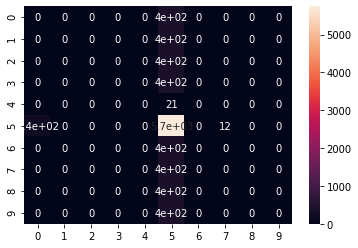

In [28]:
sns.heatmap(cm, annot=True)